ANALYSIS NOTEBOOK  - DONNELLY 2019 PLOS ONE

Patrick M. Donnelly  

University of Washington

JULY 7, 2020

In [13]:
# import necessary databases and libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [4]:
# plot inline figures
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.stats import linregress
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
plt.rcParams['pdf.fonttype'] = 42
from numpy.polynomial.polynomial import polyfit

In [5]:
# pull data from data folder in repository
data = pd.read_csv('data/data.csv')

In [6]:
# separate data into figure-specific dataframes
passage_data = data[['pigs_casecontrol', 'study_name', 'short_first_time', 
                          'short_first_acc', 'short_first_rate', 'long_first_time', 
                          'long_first_acc','long_first_rate', 'short_second_time', 
                          'short_second_acc', 'short_second_rate', 
                          'long_second_time', 'long_second_acc', 'long_second_rate']]
passage_diff_data = data[['pigs_casecontrol', 'study_name', 'first_acc_diff', 'second_rate_diff']]
wordlist_data = data[['pigs_casecontrol', 'study_name','word_time', 'word_acc', 'word_rate',
                           'pseudo_time', 'pseudo_acc', 'pseudo_rate']]
wordlist_acc_data = data[['record_id', 'int_session', 'pigs_casecontrol', 
                               'study_name','pigs_word1_acc', 'pigs_word2_acc', 
                               'pigs_pseudo1_acc', 'pigs_pseudo2_acc']]
wordlist_acc_diff_data = data[['pigs_casecontrol', 'word_acc_diff', 'pseudo_acc_diff']]
wordlist_rate_data = data[['pigs_casecontrol', 'study_name', 'word_rate','pseudo_rate']]
matlab_data = data[['record_id', 'int_session', 'pigs_casecontrol', 
                               'study_name','pigs_word1_acc', 'pigs_word2_acc', 
                               'pigs_pseudo1_acc', 'pigs_pseudo2_acc','first_acc', 'second_rate', 'wj_brs', 'twre_index',
                         'ctopp_rapid','pigs_practice_numstories']]
first_accuracy = data[['pigs_casecontrol', 'study_name','short_first_acc',
                          'long_first_acc', 'first_acc_diff']]
second_rate = data[['pigs_casecontrol', 'study_name', 'short_second_rate', 'long_second_rate', 'second_rate_diff']]
predictor_data = data[['pigs_casecontrol', 'study_name','visit_age', 'word_acc_diff', 'pseudo_acc_diff', 
                            'first_acc_diff', 'second_rate_diff', 'ctopp_pa', 'ctopp_pm','ctopp_rapid', 'wasi_fs2']]


(-2, 3)

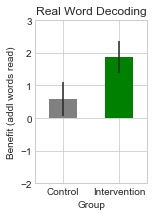

In [7]:
#Plot figure 2B
wordlist_acc_diff_grouped = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff'].mean()
wl_acc_diff_grpd_error = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff'].sem()
fig1 = wordlist_acc_diff_grouped.plot(kind='bar', yerr=wl_acc_diff_grpd_error, 
                                      legend=False, title='Real Word Decoding', 
                                      rot=0, figsize=(2,3), color=['grey', 'green'])
fig1.set_xlabel('Group')
fig1.set_ylabel('Benefit (addl words read)')
fig1.set_xticklabels(['Control', 'Intervention']), 
fig1.set_ylim([-2,3])

(-2, 3)

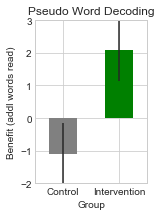

In [8]:
# Plot figure 2C
wordlist_acc_diff_grouped = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['pseudo_acc_diff'].mean()
wl_acc_diff_grpd_error = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['pseudo_acc_diff'].sem()
fig2 = wordlist_acc_diff_grouped.plot(kind='bar', yerr=wl_acc_diff_grpd_error, 
                                      legend=False, figsize=(2,3), fontsize=10, 
                                      color=['grey', 'green'], title='Pseudo Word Decoding',
                                      rot=0)
fig2.set_xlabel('Group')
fig2.set_ylabel('Benefit (addl words read)')
fig2.set_xticklabels(['Control', 'Intervention'])
fig2.set_ylim([-2,3])

(0, 0.075)

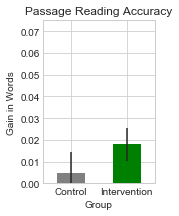

In [9]:
# plot figure 3A
acc_grouped = passage_diff_data.groupby(['pigs_casecontrol'])[ 'first_acc_diff'].mean()
acc_grouped_error = passage_diff_data.groupby(['pigs_casecontrol'])[ 'first_acc_diff'].sem()

first_acc = acc_grouped.plot(kind='bar',color=['grey', 'green'],figsize=(2,3),
                             yerr=acc_grouped_error, title='Passage Reading Accuracy', rot=0)
first_acc.set_xlabel('Group')
first_acc.set_ylabel('Gain in Words')
#short_acc.legend(loc='upper left', labels=('Short Passages', 'Long Passages'))
first_acc.set_xticklabels(['Control', 'Intervention'])
first_acc.set_ylim([0,0.075])

(0, 0.075)

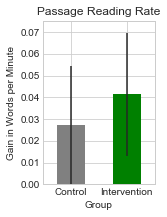

In [10]:
# Plot figure 3B
rate_grouped = passage_diff_data.groupby(['pigs_casecontrol'])['second_rate_diff'].mean()
rate_grouped_error = passage_diff_data.groupby(['pigs_casecontrol'])['second_rate_diff'].sem()

rate = rate_grouped.plot(kind='bar', yerr=rate_grouped_error, figsize=(2,3),
                         title='Passage Reading Rate', rot=0, color=['grey', 'green'])
rate.set_xlabel('Group')
rate.set_ylabel('Gain in Words per Minute')
#rate.legend(loc='upper left', labels=('Short Passages', 'Long Passages'))
rate.set_xticklabels(['Control', 'Intervention'])
rate.set_ylim([0,0.075])

In [11]:
#Plot Supplmentary Figure 1

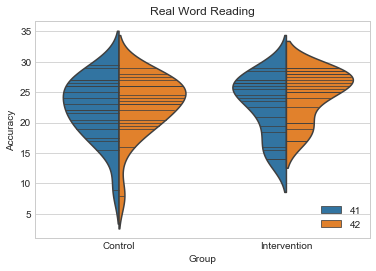

In [14]:
g = sns.violinplot(x="pigs_casecontrol", y="word_acc", hue="study_name",
               data = wordlist_data, split=True, inner='stick')
g.set_title("Real Word Reading")
g.set_xlabel("Group")
g.set_ylabel("Accuracy")
g.set_xticklabels(["Control", "Intervention"])
g.legend(loc='lower right')

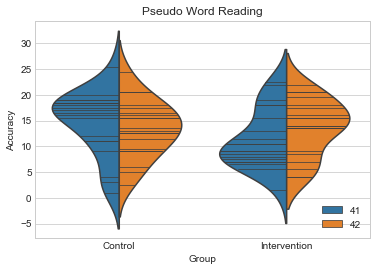

In [15]:
g = sns.violinplot(x="pigs_casecontrol", y="pseudo_acc", hue="study_name",
               data = wordlist_data, split=True, inner='stick')
g.set_title("Pseudo Word Reading")
g.set_xlabel("Group")
g.set_ylabel("Accuracy")
g.set_xticklabels(["Control", "Intervention"])
g.legend(loc='lower right')

In [16]:
g = sns.violinplot(x="pigs_casecontrol", y="first_acc", hue="study_name",
               data = passage_data, split=True, inner='stick')
g.set_title("Passage Reading Accuracy")
g.set_xlabel("Group")
g.set_ylabel("Accuracy")
g.set_xticklabels(["Control", "Intervention"])
g.legend(loc='lower right')


ValueError: Could not interpret input 'first_acc'